In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")

random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)


In [2]:
objects = {
    0: 'bottle', 
    1: 'bandage', 
    2: 'remote', 
    3: 'can', 
    4: 'candle', 
    5: 'box', 
    6: 'book', 
    7: 'cup'
}
conditions = {
    0: 'scene_Kolkhorst',
    1: 'scene_fastERP',
    2: 'scene_cVEP',
    3: 'screen_fastERP',
    4: 'screen_cVEP'
}
n_objs = 8
n_runs = 8
n_reps = 2
n_trials = n_reps * len(conditions)
n_blocks = 3


save_dir = './config'


# Randomize pictogram order

In [3]:
df_pictogram_order = pd.DataFrame([[i for i in np.random.permutation(np.arange(n_objs))] for _ in range(n_blocks)], index=[f'block_{i}' for i in range(n_blocks)]).T
df_pictogram_order.to_csv(f"{save_dir}/pictogram_orders.csv", index=True)
df_pictogram_order

,block_0,block_1,block_2
0,1,3,0
1,5,7,6
2,0,0,3
3,7,4,1
4,2,5,4
5,4,2,5
6,3,1,2
7,6,6,7


# Randomize trial order

In [4]:
used_orders = []
trial_orders = dict()
obj_orders = dict()
for run_id in range(n_runs):
    new_keys = np.random.permutation(list(conditions.keys())).tolist()
    if new_keys in used_orders:
        continue
    used_orders.append(new_keys)
    trial_orders[f'run_{run_id}'] = np.ravel([[i] * n_reps for i in new_keys])


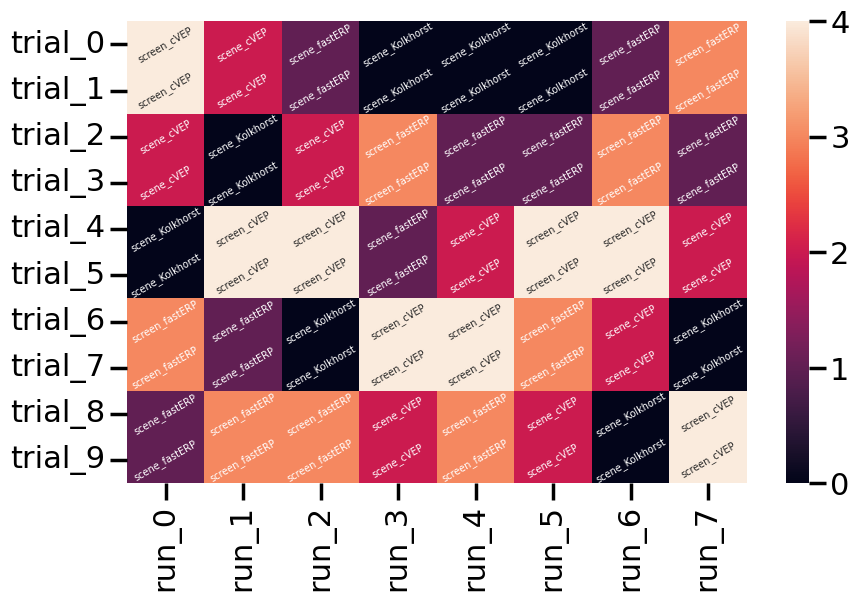

In [5]:
df_trial_orders = pd.DataFrame(trial_orders, index=[f'trial_{i}' for i in range(n_trials)])
df_trial_orders.to_csv(f"{save_dir}/trial_orders.csv", index=True)

# Use heatmap to visualize trial orders. Use the string values as annotations instead of indices
plt.figure(figsize=(10, 6))
sns.heatmap(df_trial_orders, annot=df_trial_orders.replace(conditions), fmt='s', annot_kws={'rotation':30, 'size':7})
plt.savefig(f"{save_dir}/trial_orders_heatmap.png")
plt.show()

# Randomize object order

In [6]:
obj_orders = np.zeros_like(df_trial_orders) - 1

for condition_id in range(len(conditions)):
    obj_order = np.ravel([np.random.permutation(np.arange(n_objs)) for _ in range(n_reps)])
    k = 0
    for i in range(obj_orders.shape[1]):
        for j in range(obj_orders.shape[0]):
            if df_trial_orders.values[j, i] == condition_id:
                obj_orders[j, i] = obj_order[k]
                k += 1

df_obj_orders = pd.DataFrame(obj_orders, columns=df_trial_orders.columns, index=df_trial_orders.index)
df_obj_orders.to_csv(f'{save_dir}/obj_orders.csv', index=True)
df_obj_orders

,run_0,run_1,run_2,run_3,run_4,run_5,run_6,run_7
trial_0,2,4,0,0,0,7,6,7
trial_1,1,5,2,3,6,2,5,3
trial_2,0,6,3,7,2,4,4,1
trial_3,2,4,7,4,0,7,6,3
trial_4,2,7,5,6,4,4,5,5
trial_5,5,3,6,4,2,0,2,3
trial_6,2,1,1,0,1,5,7,1
trial_7,0,3,7,4,3,0,6,4
trial_8,7,5,6,1,1,1,5,6
trial_9,5,3,1,6,2,0,3,7
